In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
#from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import torch
import torch.nn as nn

In [11]:
df1 = pd.read_excel('/content/AMZN.xlsx')
df2 = pd.read_excel('/content/FB.xlsx')
df3 = pd.read_excel('/content/AAPL.xlsx')
df4 = pd.read_excel('/content/NFLX.xlsx')
df5 = pd.read_excel('/content/GOOG.xlsx')

In [12]:
print(df1.tail())
print(df2.tail())
print(df3.tail())
print(df4.tail())
print(df5.tail())

           Date        Close
1372 2020-06-16  2615.270020
1373 2020-06-17  2640.979980
1374 2020-06-18  2653.979980
1375 2020-06-19  2675.010010
1376 2020-06-22  2713.820068
           Date       Close
1372 2020-06-16  235.649994
1373 2020-06-17  235.529999
1374 2020-06-18  235.940002
1375 2020-06-19  238.789993
1376 2020-06-22  239.220000
           Date       Close
1372 2020-06-16  352.079987
1373 2020-06-17  351.589996
1374 2020-06-18  351.730011
1375 2020-06-19  349.720001
1376 2020-06-22  358.869995
           Date       Close
1372 2020-06-16  436.130005
1373 2020-06-17  447.769989
1374 2020-06-18  449.869995
1375 2020-06-19  453.720001
1376 2020-06-22  468.040009
           Date        Close
1372 2020-06-16  1442.719971
1373 2020-06-17  1451.119995
1374 2020-06-18  1435.959961
1375 2020-06-19  1431.719971
1376 2020-06-22  1451.859985


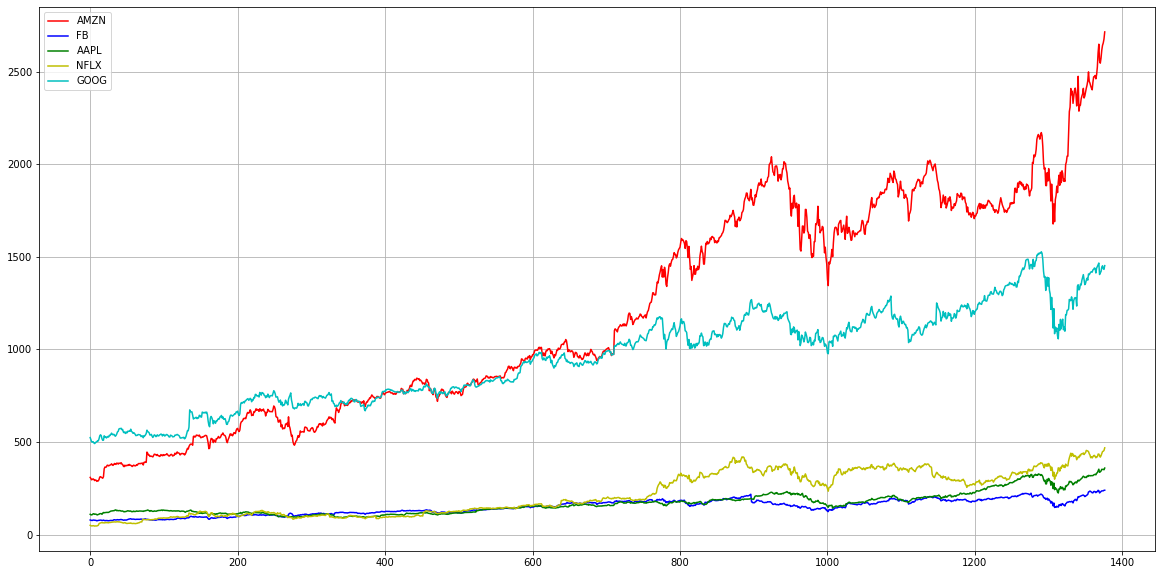

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10

plt.plot(df1['Close'], c = 'r', label = 'AMZN')
plt.plot(df2['Close'], c = 'b', label = 'FB')
plt.plot(df3['Close'], c = 'g',label = 'AAPL')
plt.plot(df4['Close'], c = 'y',label = 'NFLX')
plt.plot(df5['Close'], c = 'c',label = 'GOOG')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df = pd.read_excel('/content/all features 2015.xlsx')
df

,Date,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news
0,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370
1,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219
2,2015-02-04,1.2890,1.2580,6.2477,0.8836,0.6589,55.80,1269.08,2.07,0.11,0.220129
3,2015-02-05,1.2823,1.2436,6.2520,0.8717,0.6526,57.81,1264.25,2.02,0.12,0.220235
4,2015-02-06,1.2826,1.2528,6.2441,0.8838,0.6560,58.93,1234.00,2.06,0.11,0.219979
...,...,...,...,...,...,...,...,...,...,...,...
1331,2020-06-02,1.4512,1.3527,7.1012,0.8949,0.7969,39.57,1727.99,1.52,0.06,-0.393005
1332,2020-06-03,1.4440,1.3502,7.1156,0.8902,0.7953,39.79,1698.10,1.54,0.06,-0.389954
1333,2020-06-04,1.4398,1.3494,7.1105,0.8821,0.7937,39.99,1713.39,1.56,0.06,-0.388312
1334,2020-06-05,1.4350,1.3421,7.0817,0.8856,0.7895,42.30,1683.65,1.59,0.07,-0.387279


In [29]:
twitter=pd.read_excel('/content/all twitter score.xlsx')
twitter['avg_twitter_score'] = twitter.rolling(window=21).mean()
twitter = twitter[['Date','avg_twitter_score','twitter score']]
twitter = twitter.drop(columns = ['twitter score'])
twitter.tail(20)

,Date,avg_twitter_score
2934,2020-05-26,0.427021
2935,2020-05-27,0.433589
2936,2020-05-28,0.420568
2937,2020-05-29,0.420116
2938,2020-06-01,0.427866
2939,2020-06-02,0.436241
2940,2020-06-03,0.429762
2941,2020-06-04,0.431093
2942,2020-06-05,0.420685
2943,2020-06-08,0.417297


FOR AMZN:

In [17]:
data = df1

holidays = pd.read_excel('/content/Holidays.xlsx')

data = data[['Date','Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})


lst = holidays['Holiday'].tolist()
holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(lst),
  'lower_window': 0,
  'upper_window': 5,
})
holiday

from fbprophet import Prophet
m = Prophet(interval_width = 0.5, yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.15, holidays = holiday)  
m.fit(data)

future = m.make_future_dataframe(periods=10)
prediction = m.predict(future)
pred= prediction['yhat']

data = df1[['Date','Close']]
data['Prophet trend'] = pred[:-10]
data = data[['Date','Prophet trend','Close']]
data

,Date,Prophet trend,Close
0,2015-01-02,307.140252,308.519989
1,2015-01-05,310.457423,302.190002
2,2015-01-06,332.144175,295.290009
3,2015-01-07,320.719475,298.420013
4,2015-01-08,323.957874,300.459991
...,...,...,...
1372,2020-06-16,2451.544557,2615.270020
1373,2020-06-17,2452.779984,2640.979980
1374,2020-06-18,2453.261324,2653.979980
1375,2020-06-19,2448.916945,2675.010010


In [ ]:
from functools import reduce

data_frames = [df,twitter,data]
df_net = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
df_net

,Date,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news,avg_twitter_score,Prophet trend,Close
0,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.264418,341.878453,364.470001
1,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.118068,341.878453,364.470001
2,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.216799,345.230277,363.549988
3,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.120869,345.230277,363.549988
4,2015-02-04,1.2890,1.2580,6.2477,0.8836,0.6589,55.80,1269.08,2.07,0.11,0.220129,0.280291,348.197399,364.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,2020-06-02,1.4512,1.3527,7.1012,0.8949,0.7969,39.57,1727.99,1.52,0.06,-0.393005,0.081420,2421.574486,2472.409912
1512,2020-06-03,1.4440,1.3502,7.1156,0.8902,0.7953,39.79,1698.10,1.54,0.06,-0.389954,0.072545,2427.146784,2478.399902
1513,2020-06-04,1.4398,1.3494,7.1105,0.8821,0.7937,39.99,1713.39,1.56,0.06,-0.388312,0.072505,2432.030676,2460.600098
1514,2020-06-05,1.4350,1.3421,7.0817,0.8856,0.7895,42.30,1683.65,1.59,0.07,-0.387279,0.064986,2432.059877,2483.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



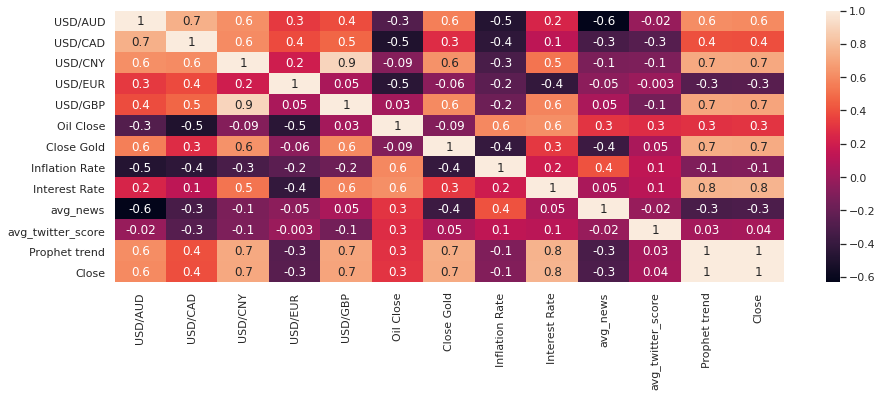

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
import seaborn as sns; sns.set()
sns.heatmap(df_net.corr(), annot = True, fmt='.1g')

In [ ]:
df_net = df_net.drop(columns = ['Date'])

In [ ]:

from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
df_net['USD/AUD'] = sc.fit_transform(np.array(df_net['USD/AUD']).reshape(-1, 1))
df_net['USD/CAD'] = sc.fit_transform(np.array(df_net['USD/CAD']).reshape(-1, 1))
df_net['USD/CNY'] = sc.fit_transform(np.array(df_net['USD/CNY']).reshape(-1, 1))
df_net['USD/GBP'] = sc.fit_transform(np.array(df_net['USD/GBP']).reshape(-1, 1))
df_net['Oil Close'] = sc.fit_transform(np.array(df_net['Oil Close']).reshape(-1, 1))
df_net['Close Gold'] = sc.fit_transform(np.array(df_net['Close Gold']).reshape(-1, 1))
df_net['Inflation Rate'] = sc.fit_transform(np.array(df_net['Inflation Rate']).reshape(-1, 1))
df_net['Interest Rate'] = sc.fit_transform(np.array(df_net['Interest Rate']).reshape(-1, 1))
df_net['avg_news'] = sc.fit_transform(np.array(df_net['avg_news']).reshape(-1, 1))
df_net['avg_twitter_score'] = sc.fit_transform(np.array(df_net['avg_twitter_score']).reshape(-1, 1))
df_net['Prophet trend'] = sc.fit_transform(np.array(df_net['Prophet trend']).reshape(-1, 1))
df_net['Close'] = sc.fit_transform(np.array(df_net['Close']).reshape(-1, 1))

In [ ]:
input_feature= df_net.iloc[:,:].values
input_data = input_feature

input_data

array([[9.97257053e-02, 2.41207951e-01, 6.70657468e-02, ...,
        7.23103586e-01, 5.81668865e-03, 4.25831387e-04],
       [9.97257053e-02, 2.41207951e-01, 6.70657468e-02, ...,
        3.29901542e-01, 5.81668865e-03, 4.25831387e-04],
       [1.11873041e-01, 1.87691131e-01, 6.54423701e-02, ...,
        5.95164648e-01, 7.40468489e-03, 0.00000000e+00],
       ...,
       [4.08503135e-01, 5.89449541e-01, 9.30499188e-01, ...,
        2.07487237e-01, 9.96069793e-01, 9.70627325e-01],
       [3.99098746e-01, 5.61544343e-01, 9.01278409e-01, ...,
        1.87286352e-01, 9.96083628e-01, 9.80995201e-01],
       [3.77155172e-01, 5.45489297e-01, 8.91132305e-01, ...,
        2.02765957e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
window = 100
output = 1
train_size = int(len(df_net) * 0.80)
test_size = len(df_net) - train_size

In [ ]:
df_net

,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news,avg_twitter_score,Prophet trend,Close
0,0.099726,0.241208,0.067066,0.8818,0.149210,0.529719,0.337815,0.842553,0.033195,0.789124,0.723104,0.005817,0.000426
1,0.099726,0.241208,0.067066,0.8818,0.149210,0.529719,0.337815,0.842553,0.033195,0.789124,0.329902,0.005817,0.000426
2,0.111873,0.187691,0.065442,0.8728,0.128429,0.588262,0.302991,0.851064,0.033195,0.787812,0.595165,0.007405,0.000000
3,0.111873,0.187691,0.065442,0.8728,0.128429,0.588262,0.302991,0.851064,0.033195,0.787812,0.337427,0.007405,0.000000
4,0.113049,0.240061,0.055093,0.8836,0.121779,0.544654,0.315094,0.880851,0.029046,0.785433,0.765750,0.008810,0.000555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.430839,0.602064,0.921063,0.8949,0.695345,0.302270,0.970043,0.646809,0.008299,0.087228,0.231438,0.991116,0.976094
1512,0.416732,0.592508,0.935674,0.8902,0.688695,0.305556,0.927385,0.655319,0.008299,0.090702,0.207595,0.993756,0.978866
1513,0.408503,0.589450,0.930499,0.8821,0.682045,0.308542,0.949206,0.663830,0.008299,0.092572,0.207487,0.996070,0.970627
1514,0.399099,0.561544,0.901278,0.8856,0.664589,0.343041,0.906762,0.676596,0.012448,0.093748,0.187286,0.996084,0.980995


In [ ]:
train_data = input_data[:-test_size,:]
test_data = input_data[-test_size-window:,:]

EMA = 0.0
gamma = 0.1
for ti in range(train_size):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
train_data_normalized = torch.FloatTensor(train_data)
test_data_normalized = torch.FloatTensor(test_data)


In [ ]:
def create_inout_sequences(input_data, tw):
    train_inout_seq = []
    
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw,:]
        train_label = input_data[i+tw:i+tw+1,12]
        train_inout_seq.append((train_seq,train_label))
    return train_inout_seq



train_inout_seq = create_inout_sequences(train_data_normalized, window)
test_inout_seq = create_inout_sequences(test_data_normalized, window)

In [ ]:
class LSTM(nn.Module):
 
    def __init__ (self, input_dim, hidden_dim, batch_size, dropout, num_layers, output_dim):

        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.drop = dropout
        #self.drop = nn.Dropout(self.drop)
 
        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = self.drop)
 
        # Define the output layer
        self.fc = nn.Sequential(
            nn.Dropout(self.drop),
            nn.Linear(self.hidden_dim, output_dim),
        )
 
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
 
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.fc(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)





In [ ]:
lstm_input_size = 13
h1 = 10
batch_size = 1
output_dim = 1
num_layers = 1
dropout = 0.2
model = LSTM(lstm_input_size, h1, batch_size=batch_size, output_dim=output_dim, num_layers=num_layers, dropout = dropout)

loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = 0.001)

#####################
# Train model
#####################

num_epochs = 100

hist = np.zeros(num_epochs)

train_loss_ep = np.zeros(21)
test_loss_ep = np.zeros(21)
count = 0
for i in range(num_epochs+1):

  train_loss = [] 
  
  train_predict = []
  train_actual = []
  # Clear stored gradient

  model.train()
  for seq, labels in train_inout_seq:

    optimiser.zero_grad()
    model.zero_grad()
    
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(seq)
    train_predict.append((y_pred.item()))
    train_actual.append((labels))
 
    loss = loss_fn(y_pred, labels)
    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()
 
    # Backward pass
    loss.backward()
 
    # Update parameters
    optimiser.step()

    train_loss.append((loss.item()))

  if (i%5 == 0):
    print("Epoch ", i, "train MSE: ", sum(train_loss)/len(train_loss))
    train_loss_ep[count] = sum(train_loss)/len(train_loss)
    loss_tot1 = [] 
    test_predict = []
    test_actual = []

    model.eval()
    for seq1, labels1 in test_inout_seq:
      with torch.no_grad():
        #model.hidden = model.init_hidden()
        
        y_pred1 = model(seq1)
        test_predict.append(y_pred1.item())
        loss1 = loss_fn(y_pred1, labels1)

      loss_tot1.append((loss1.item()))

      test_actual.append((labels1))

    print("test MSE: ", sum(loss_tot1)/len(loss_tot1))
    test_loss_ep[count] = sum(loss_tot1)/len(loss_tot1)
    count = count + 1




/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



Epoch  0 train MSE:  0.0014441537268968985
test MSE:  0.021404414102586377
Epoch  5 train MSE:  0.0016687556683271968
test MSE:  0.02496954418062776
Epoch  10 train MSE:  0.0013288607239062735
test MSE:  0.0231780367760525
Epoch  15 train MSE:  0.0013864476172005778
test MSE:  0.03334223448952176
Epoch  20 train MSE:  0.001474845072541199
test MSE:  0.024233341103593518
Epoch  25 train MSE:  0.0014498292653532165
test MSE:  0.021689892529809043
Epoch  30 train MSE:  0.0013886079030609043
test MSE:  0.024277155482901724
Epoch  35 train MSE:  0.001467712723732417
test MSE:  0.02673697570337122
Epoch  40 train MSE:  0.0015857214500772901
test MSE:  0.02360501136307167
Epoch  45 train MSE:  0.001645411475645958
test MSE:  0.028063840957656794
Epoch  50 train MSE:  0.0015085858725856851
test MSE:  0.024983154671645025
Epoch  55 train MSE:  0.0014556245109973898
test MSE:  0.02687339299327026
Epoch  60 train MSE:  0.0014206739195027306
test MSE:  0.019978026146262845
Epoch  65 train MSE:  0.

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



Epoch  0 train MSE:  0.0014441537268968985
test MSE:  0.021404414102586377
Epoch  5 train MSE:  0.0016687556683271968
test MSE:  0.02496954418062776
Epoch  10 train MSE:  0.0013288607239062735
test MSE:  0.0231780367760525
Epoch  15 train MSE:  0.0013864476172005778
test MSE:  0.03334223448952176
Epoch  20 train MSE:  0.001474845072541199
test MSE:  0.024233341103593518
Epoch  25 train MSE:  0.0014498292653532165
test MSE:  0.021689892529809043
Epoch  30 train MSE:  0.0013886079030609043
test MSE:  0.024277155482901724
Epoch  35 train MSE:  0.001467712723732417
test MSE:  0.02673697570337122
Epoch  40 train MSE:  0.0015857214500772901
test MSE:  0.02360501136307167
Epoch  45 train MSE:  0.001645411475645958
test MSE:  0.028063840957656794
Epoch  50 train MSE:  0.0015085858725856851
test MSE:  0.024983154671645025
Epoch  55 train MSE:  0.0014556245109973898
test MSE:  0.02687339299327026
Epoch  60 train MSE:  0.0014206739195027306
test MSE:  0.019978026146262845
Epoch  65 train MSE:  0.

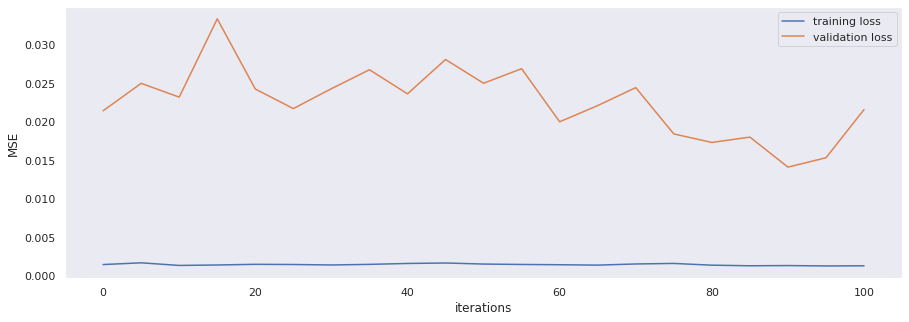

In [ ]:
a = np.arange(21)  
a = a*5 
plot1 = plt.figure(1)
plt.plot(a, train_loss_ep, label='training loss')
plt.plot(a,test_loss_ep, label = 'validation loss')
plt.xlabel('iterations')
plt.ylabel('MSE')

plt.legend()
plt.grid()
plt.savefig('training and validation losses.png')
plt.show()

In [ ]:
close = df1.Close

scaler= MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(np.array(close).reshape(-1, 1))
train_predict = scaler.inverse_transform(np.array(train_predict).reshape(-1, 1))
train_Y = scaler.inverse_transform([train_actual])
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))
test_Y = scaler.inverse_transform([test_actual])

import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(train_Y,train_predict.reshape(1,-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y,test_predict.reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))
data =  np.array(close).reshape(-1,1)

Train Score: 86.96 RMSE
Test Score: 356.36 RMSE


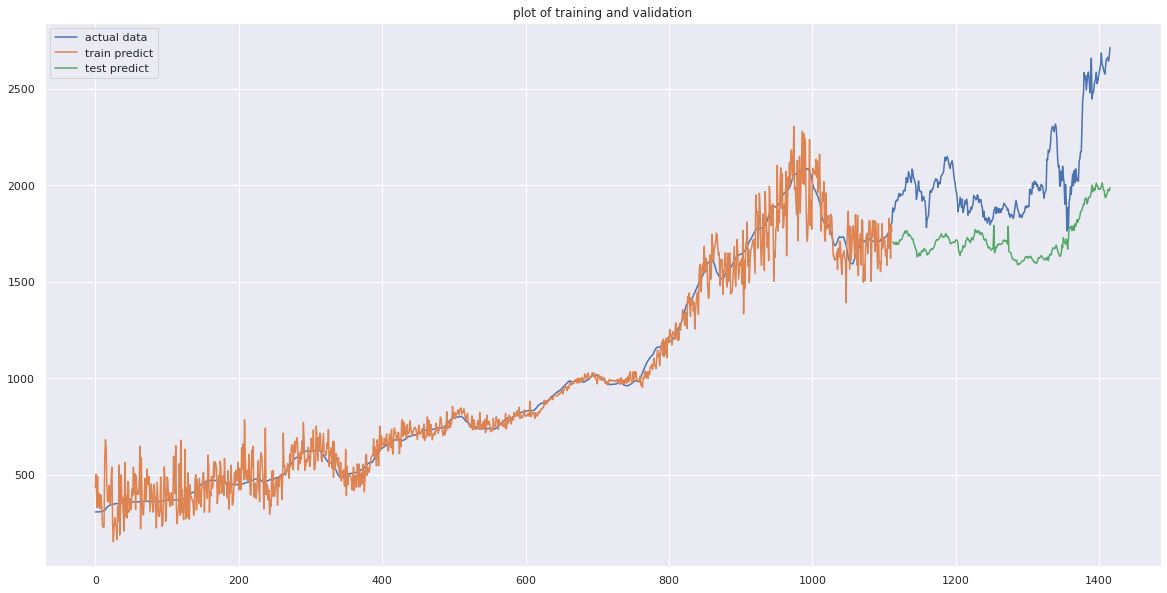

In [ ]:
train_Y=train_Y.reshape(-1,1)
test_Y = test_Y.reshape(-1,1)
data = np.concatenate((train_Y, test_Y), axis=0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
                                                                                                                                                                                                                                                                                                               
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):len(train_predict)+len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(data, label = 'actual data')
plt.plot(trainPredictPlot, label = 'train predict')
plt.plot(testPredictPlot, label = 'test predict')
plt.legend()
plt.title('plot of training and validation')
plt.grid(True)
plt.savefig('AMZN plot.png')
plt.show()

In [ ]:
np.save('train_predict_amzn.npy', train_predict)
np.save('test_predict_amzn.npy', test_predict)

In [ ]:
from google.colab import files
files.download('train_predict_amzn.npy') 
files.download('test_predict_amzn.npy') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FOR FB

In [ ]:
data = df2

holidays = pd.read_excel('/content/Holidays.xlsx')

data = data[['Date','Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})


lst = holidays['Holiday'].tolist()
holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(lst),
  'lower_window': 0,
  'upper_window': 5,
})
holiday

from fbprophet import Prophet
m = Prophet(interval_width = 0.5, yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.15, holidays = holiday)  
m.fit(data)

future = m.make_future_dataframe(periods=10)
prediction = m.predict(future)
pred= prediction['yhat']

data = df2[['Date','Close']]
data['Prophet trend'] = pred[:-10]
data = data[['Date','Prophet trend','Close']]
data

,Date,Prophet trend,Close
0,2015-01-02,75.801814,78.449997
1,2015-01-05,76.224086,77.190002
2,2015-01-06,79.630759,76.150002
3,2015-01-07,77.903042,76.150002
4,2015-01-08,78.397494,78.180000
...,...,...,...
1372,2020-06-16,212.098851,235.649994
1373,2020-06-17,212.203790,235.529999
1374,2020-06-18,212.335070,235.940002
1375,2020-06-19,212.198038,238.789993


In [ ]:
from functools import reduce

data_frames = [df,twitter,data]
df_net = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
df_net

,Date,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news,avg_twitter_score,Prophet trend,Close
0,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.264418,81.193609,74.989998
1,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.118068,81.193609,74.989998
2,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.216799,81.210509,75.400002
3,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.120869,81.210509,75.400002
4,2015-02-04,1.2890,1.2580,6.2477,0.8836,0.6589,55.80,1269.08,2.07,0.11,0.220129,0.280291,81.250142,75.629997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,2020-06-02,1.4512,1.3527,7.1012,0.8949,0.7969,39.57,1727.99,1.52,0.06,-0.393005,0.081420,210.876231,232.720001
1512,2020-06-03,1.4440,1.3502,7.1156,0.8902,0.7953,39.79,1698.10,1.54,0.06,-0.389954,0.072545,211.139427,230.160004
1513,2020-06-04,1.4398,1.3494,7.1105,0.8821,0.7937,39.99,1713.39,1.56,0.06,-0.388312,0.072505,211.429561,226.289993
1514,2020-06-05,1.4350,1.3421,7.0817,0.8856,0.7895,42.30,1683.65,1.59,0.07,-0.387279,0.064986,211.446225,230.770004


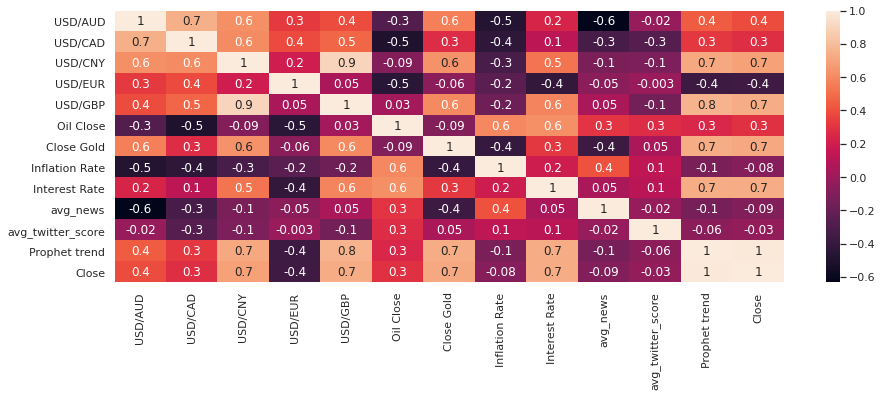

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
import seaborn as sns; sns.set()
sns.heatmap(df_net.corr(), annot = True, fmt='.1g')

In [ ]:

from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
df_net['USD/AUD'] = sc.fit_transform(np.array(df_net['USD/AUD']).reshape(-1, 1))
df_net['USD/CAD'] = sc.fit_transform(np.array(df_net['USD/CAD']).reshape(-1, 1))
df_net['USD/CNY'] = sc.fit_transform(np.array(df_net['USD/CNY']).reshape(-1, 1))
df_net['USD/GBP'] = sc.fit_transform(np.array(df_net['USD/GBP']).reshape(-1, 1))
df_net['Oil Close'] = sc.fit_transform(np.array(df_net['Oil Close']).reshape(-1, 1))
df_net['Close Gold'] = sc.fit_transform(np.array(df_net['Close Gold']).reshape(-1, 1))
df_net['Inflation Rate'] = sc.fit_transform(np.array(df_net['Inflation Rate']).reshape(-1, 1))
df_net['Interest Rate'] = sc.fit_transform(np.array(df_net['Interest Rate']).reshape(-1, 1))
df_net['avg_news'] = sc.fit_transform(np.array(df_net['avg_news']).reshape(-1, 1))
df_net['avg_twitter_score'] = sc.fit_transform(np.array(df_net['avg_twitter_score']).reshape(-1, 1))
df_net['Prophet trend'] = sc.fit_transform(np.array(df_net['Prophet trend']).reshape(-1, 1))
df_net['Close'] = sc.fit_transform(np.array(df_net['Close']).reshape(-1, 1))

In [ ]:
input_feature= df_net.iloc[:,:].values
input_data = input_feature

input_data
window = 100
output = 1
train_size = int(len(df_net) * 0.80)
test_size = len(df_net) - train_size

In [ ]:
train_data = input_data[:-test_size,:]
test_data = input_data[-test_size-window:,:]

EMA = 0.0
gamma = 0.1
for ti in range(train_size):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
train_data_normalized = torch.FloatTensor(train_data)
test_data_normalized = torch.FloatTensor(test_data)

In [ ]:
def create_inout_sequences(input_data, tw):
    train_inout_seq = []
    
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw,:]
        train_label = input_data[i+tw:i+tw+1,12]
        train_inout_seq.append((train_seq,train_label))
    return train_inout_seq



train_inout_seq = create_inout_sequences(train_data_normalized, window)
test_inout_seq = create_inout_sequences(test_data_normalized, window)

In [ ]:
class LSTM(nn.Module):
 
    def __init__ (self, input_dim, hidden_dim, batch_size, dropout, num_layers, output_dim):

        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.drop = dropout
        #self.drop = nn.Dropout(self.drop)
 
        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = self.drop)
 
        # Define the output layer
        self.fc = nn.Sequential(
            nn.Dropout(self.drop),
            nn.Linear(self.hidden_dim, output_dim),
        )
 
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
 
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.fc(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)





In [ ]:
lstm_input_size = 13
h1 = 20
batch_size = 1
output_dim = 1
num_layers = 1
dropout = 0.2
model = LSTM(lstm_input_size, h1, batch_size=batch_size, output_dim=output_dim, num_layers=num_layers, dropout = dropout)

loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = 0.001)

#####################
# Train model
#####################

num_epochs = 100

hist = np.zeros(num_epochs)

train_loss_ep = np.zeros(21)
test_loss_ep = np.zeros(21)
count = 0
for i in range(num_epochs+1):

  train_loss = [] 
  
  train_predict = []
  train_actual = []
  # Clear stored gradient

  model.train()
  for seq, labels in train_inout_seq:

    optimiser.zero_grad()
    model.zero_grad()
    
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(seq)
    train_predict.append((y_pred.item()))
    train_actual.append((labels))
 
    loss = loss_fn(y_pred, labels)
    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()
 
    # Backward pass
    loss.backward()
 
    # Update parameters
    optimiser.step()

    train_loss.append((loss.item()))

  if (i%5 == 0):
    print("Epoch ", i, "train MSE: ", sum(train_loss)/len(train_loss))
    train_loss_ep[count] = sum(train_loss)/len(train_loss)
    loss_tot1 = [] 
    test_predict = []
    test_actual = []

    model.eval()
    for seq1, labels1 in test_inout_seq:
      with torch.no_grad():
        #model.hidden = model.init_hidden()
        
        y_pred1 = model(seq1)
        test_predict.append(y_pred1.item())
        loss1 = loss_fn(y_pred1, labels1)

      loss_tot1.append((loss1.item()))

      test_actual.append((labels1))

    print("test MSE: ", sum(loss_tot1)/len(loss_tot1))
    test_loss_ep[count] = sum(loss_tot1)/len(loss_tot1)
    count = count + 1




/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



Epoch  0 train MSE:  0.002140248763139192
test MSE:  0.019505611971483535
Epoch  5 train MSE:  0.001240971169471406
test MSE:  0.012112638249657927
Epoch  10 train MSE:  0.0009215513126546404
test MSE:  0.015288707375404817
Epoch  15 train MSE:  0.0009310783456305697
test MSE:  0.019790536036567528
Epoch  20 train MSE:  0.0009860338779839831
test MSE:  0.024645494623749552
Epoch  25 train MSE:  0.0010261101425625375
test MSE:  0.02009956757308247
Epoch  30 train MSE:  0.0010882853845157231
test MSE:  0.020436898340068337
Epoch  35 train MSE:  0.0009168174880475295
test MSE:  0.019715992986118206
Epoch  40 train MSE:  0.0009309065107860297
test MSE:  0.020550716271935398
Epoch  45 train MSE:  0.0008618398168045822
test MSE:  0.022082587780220677
Epoch  50 train MSE:  0.0009616138835940639
test MSE:  0.019317911692140616
Epoch  55 train MSE:  0.0008212020782760468
test MSE:  0.024237610425954795
Epoch  60 train MSE:  0.0008579776778255952
test MSE:  0.021679115549934642
Epoch  65 train M

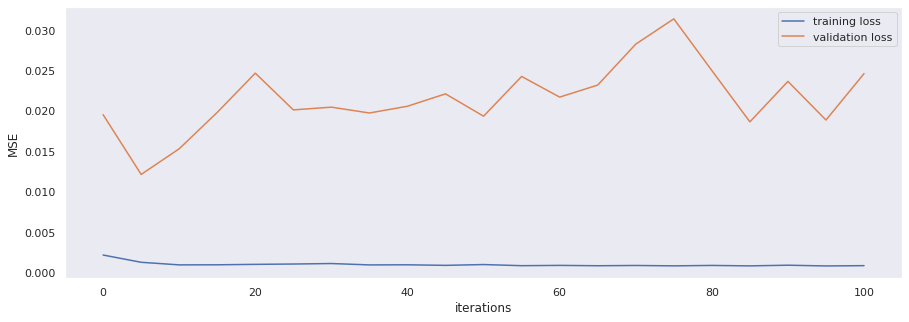

In [ ]:
a = np.arange(21)  
a = a*5 
plot1 = plt.figure(1)
plt.plot(a, train_loss_ep, label='training loss')
plt.plot(a,test_loss_ep, label = 'validation loss')
plt.xlabel('iterations')
plt.ylabel('MSE')

plt.legend()
plt.grid()
plt.savefig('training and validation losses.png')
plt.show()

In [ ]:
close = df2.Close

In [ ]:


scaler= MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(np.array(close).reshape(-1, 1))
train_predict = scaler.inverse_transform(np.array(train_predict).reshape(-1, 1))
train_Y = scaler.inverse_transform([train_actual])
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))
test_Y = scaler.inverse_transform([test_actual])

import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(train_Y,train_predict.reshape(1,-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y,test_predict.reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))
data =  np.array(close).reshape(-1,1)

Train Score: 4.75 RMSE
Test Score: 25.90 RMSE


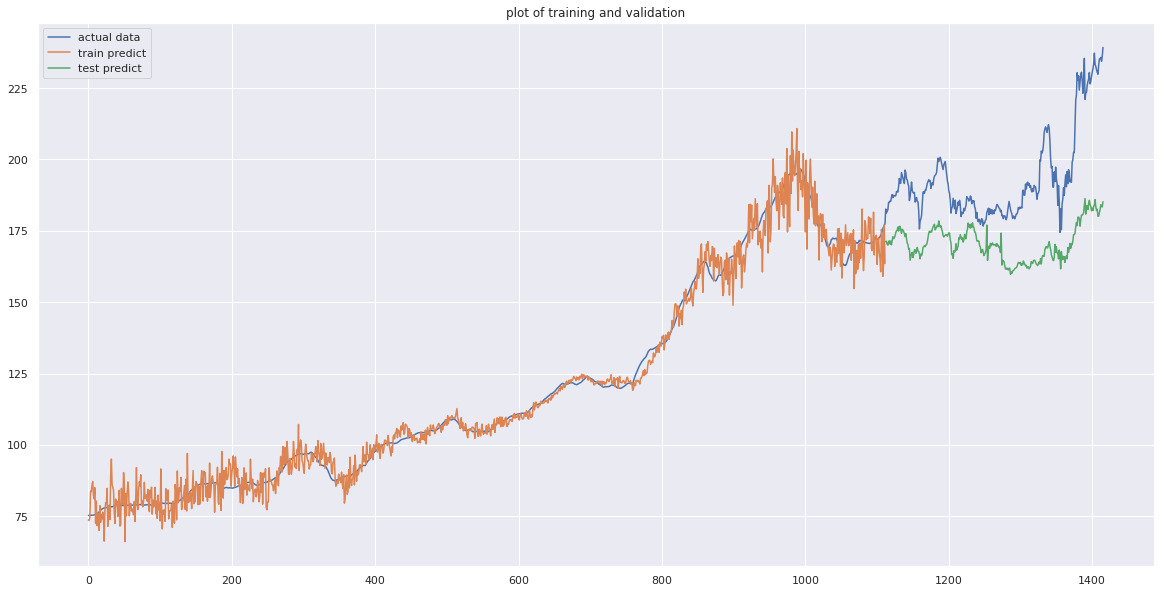

In [ ]:
train_Y=train_Y.reshape(-1,1)
test_Y = test_Y.reshape(-1,1)
data = np.concatenate((train_Y, test_Y), axis=0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
                                                                                                                                                                                                                                                                                                               
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):len(train_predict)+len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(data, label = 'actual data')
plt.plot(trainPredictPlot, label = 'train predict')
plt.plot(testPredictPlot, label = 'test predict')
plt.legend()
plt.title('plot of training and validation')
plt.grid(True)
plt.savefig('FB plot.png')
plt.show()

In [ ]:
np.save('train_predict_fb.npy', train_predict)
np.save('test_predict_fb.npy', test_predict)

In [ ]:
from google.colab import files
files.download('train_predict_fb.npy') 
files.download('test_predict_fb.npy') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FOR AAPL:

In [ ]:
data = df3
close = data.Close
holidays = pd.read_excel('/content/Holidays.xlsx')

data = data[['Date','Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})


lst = holidays['Holiday'].tolist()
holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(lst),
  'lower_window': 0,
  'upper_window': 5,
})
holiday

from fbprophet import Prophet
m = Prophet(interval_width = 0.5, yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.15, holidays = holiday)  
m.fit(data)

future = m.make_future_dataframe(periods=10)
prediction = m.predict(future)
pred= prediction['yhat']

data = df3[['Date','Close']]
data['Prophet trend'] = pred[:-10]
data = data[['Date','Prophet trend','Close']]
data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,Date,Prophet trend,Close
0,2015-01-02,109.119198,109.330002
1,2015-01-05,110.320117,106.250000
2,2015-01-06,112.383063,106.260002
3,2015-01-07,112.331551,107.750000
4,2015-01-08,112.717484,111.889999
...,...,...,...
1372,2020-06-16,315.340896,352.079987
1373,2020-06-17,315.654244,351.589996
1374,2020-06-18,315.414705,351.730011
1375,2020-06-19,315.048865,349.720001


In [ ]:
from functools import reduce

data_frames = [df,twitter,data]
df_net = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
df_net

,Date,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news,avg_twitter_score,Prophet trend,Close
0,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.264418,120.446131,118.629997
1,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.118068,120.446131,118.629997
2,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.216799,120.783319,118.650002
3,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.120869,120.783319,118.650002
4,2015-02-04,1.2890,1.2580,6.2477,0.8836,0.6589,55.80,1269.08,2.07,0.11,0.220129,0.280291,121.455853,119.559998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,2020-06-02,1.4512,1.3527,7.1012,0.8949,0.7969,39.57,1727.99,1.52,0.06,-0.393005,0.081420,312.419064,323.339996
1512,2020-06-03,1.4440,1.3502,7.1156,0.8902,0.7953,39.79,1698.10,1.54,0.06,-0.389954,0.072545,313.172279,325.119995
1513,2020-06-04,1.4398,1.3494,7.1105,0.8821,0.7937,39.99,1713.39,1.56,0.06,-0.388312,0.072505,313.397743,322.320007
1514,2020-06-05,1.4350,1.3421,7.0817,0.8856,0.7895,42.30,1683.65,1.59,0.07,-0.387279,0.064986,313.514425,331.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



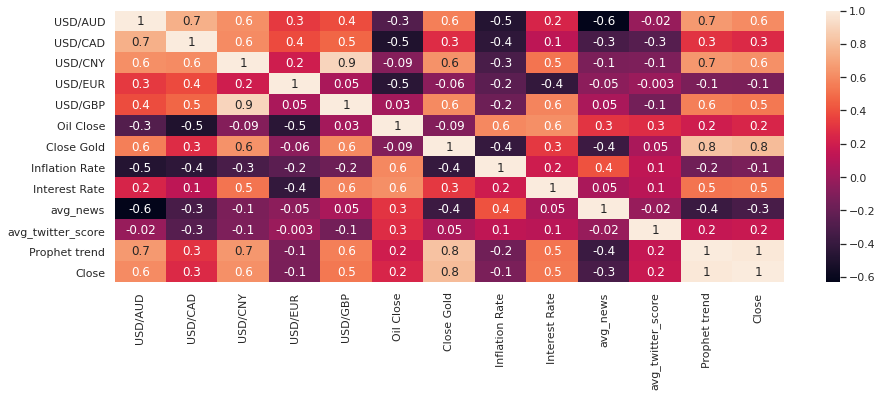

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
import seaborn as sns; sns.set()
sns.heatmap(df_net.corr(), annot = True, fmt='.1g')

In [ ]:
df_net = df_net.drop(columns = ['Date'])
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
df_net['USD/AUD'] = sc.fit_transform(np.array(df_net['USD/AUD']).reshape(-1, 1))
df_net['USD/CAD'] = sc.fit_transform(np.array(df_net['USD/CAD']).reshape(-1, 1))
df_net['USD/CNY'] = sc.fit_transform(np.array(df_net['USD/CNY']).reshape(-1, 1))
df_net['USD/GBP'] = sc.fit_transform(np.array(df_net['USD/GBP']).reshape(-1, 1))
df_net['Oil Close'] = sc.fit_transform(np.array(df_net['Oil Close']).reshape(-1, 1))
df_net['Close Gold'] = sc.fit_transform(np.array(df_net['Close Gold']).reshape(-1, 1))
df_net['Inflation Rate'] = sc.fit_transform(np.array(df_net['Inflation Rate']).reshape(-1, 1))
df_net['Interest Rate'] = sc.fit_transform(np.array(df_net['Interest Rate']).reshape(-1, 1))
df_net['avg_news'] = sc.fit_transform(np.array(df_net['avg_news']).reshape(-1, 1))
df_net['avg_twitter_score'] = sc.fit_transform(np.array(df_net['avg_twitter_score']).reshape(-1, 1))
df_net['Prophet trend'] = sc.fit_transform(np.array(df_net['Prophet trend']).reshape(-1, 1))
df_net['Close'] = sc.fit_transform(np.array(df_net['Close']).reshape(-1, 1))

In [ ]:
input_feature= df_net.iloc[:,:].values
input_data = input_feature

input_data
window = 100
output = 1
train_size = int(len(df_net) * 0.80)
test_size = len(df_net) - train_size

In [ ]:
train_data = input_data[:-test_size,:]
test_data = input_data[-test_size-window:,:]

EMA = 0.0
gamma = 0.1
for ti in range(train_size):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
train_data_normalized = torch.FloatTensor(train_data)
test_data_normalized = torch.FloatTensor(test_data)

In [ ]:
def create_inout_sequences(input_data, tw):
    train_inout_seq = []
    
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw,:]
        train_label = input_data[i+tw:i+tw+1,12]
        train_inout_seq.append((train_seq,train_label))
    return train_inout_seq



train_inout_seq = create_inout_sequences(train_data_normalized, window)
test_inout_seq = create_inout_sequences(test_data_normalized, window)

In [ ]:
class LSTM(nn.Module):
 
    def __init__ (self, input_dim, hidden_dim, batch_size, dropout, num_layers, output_dim):

        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.drop = dropout
        #self.drop = nn.Dropout(self.drop)
 
        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = self.drop)
 
        # Define the output layer
        self.fc = nn.Sequential(
            nn.Dropout(self.drop),
            nn.Linear(self.hidden_dim, output_dim),
        )
 
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
 
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.fc(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)





In [ ]:
lstm_input_size = 13
h1 = 50
batch_size = 1
output_dim = 1
num_layers = 1
dropout = 0.2
model = LSTM(lstm_input_size, h1, batch_size=batch_size, output_dim=output_dim, num_layers=num_layers, dropout = dropout)

loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = 0.001)

#####################
# Train model
#####################

num_epochs = 100

hist = np.zeros(num_epochs)

train_loss_ep = np.zeros(21)
test_loss_ep = np.zeros(21)
count = 0
for i in range(num_epochs+1):

  train_loss = [] 
  
  train_predict = []
  train_actual = []
  # Clear stored gradient

  model.train()
  for seq, labels in train_inout_seq:

    optimiser.zero_grad()
    model.zero_grad()
    
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(seq)
    train_predict.append((y_pred.item()))
    train_actual.append((labels))
 
    loss = loss_fn(y_pred, labels)
    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()
 
    # Backward pass
    loss.backward()
 
    # Update parameters
    optimiser.step()

    train_loss.append((loss.item()))

  if (i%5 == 0):
    print("Epoch ", i, "train MSE: ", sum(train_loss)/len(train_loss))
    train_loss_ep[count] = sum(train_loss)/len(train_loss)
    loss_tot1 = [] 
    test_predict = []
    test_actual = []

    model.eval()
    for seq1, labels1 in test_inout_seq:
      with torch.no_grad():
        #model.hidden = model.init_hidden()
        
        y_pred1 = model(seq1)
        test_predict.append(y_pred1.item())
        loss1 = loss_fn(y_pred1, labels1)

      loss_tot1.append((loss1.item()))

      test_actual.append((labels1))

    print("test MSE: ", sum(loss_tot1)/len(loss_tot1))
    test_loss_ep[count] = sum(loss_tot1)/len(loss_tot1)
    count = count + 1




/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



Epoch  0 train MSE:  0.0009160550952786206
test MSE:  0.10936630835739211
Epoch  5 train MSE:  0.00032686868456652154
test MSE:  0.10521559356340049
Epoch  10 train MSE:  0.0003545059770678137
test MSE:  0.10774827157752838
Epoch  15 train MSE:  0.0003752348720527634
test MSE:  0.111042201480329
Epoch  20 train MSE:  0.00039407259254868127
test MSE:  0.10978411067658331
Epoch  25 train MSE:  0.00046729940060251434
test MSE:  0.11200619608780471
Epoch  30 train MSE:  0.00040933072607808406
test MSE:  0.10800170329405857
Epoch  35 train MSE:  0.0004280730590958723
test MSE:  0.10961556628803978
Epoch  40 train MSE:  0.00043912324232704106
test MSE:  0.11071949483477128
Epoch  45 train MSE:  0.0004629682489890774
test MSE:  0.10652386302631624
Epoch  50 train MSE:  0.000409070608261933
test MSE:  0.09641135755708474
Epoch  55 train MSE:  0.0003684091562004368
test MSE:  0.08864967095944035
Epoch  60 train MSE:  0.00035828936894565465
test MSE:  0.0813356128529497
Epoch  65 train MSE:  0.0

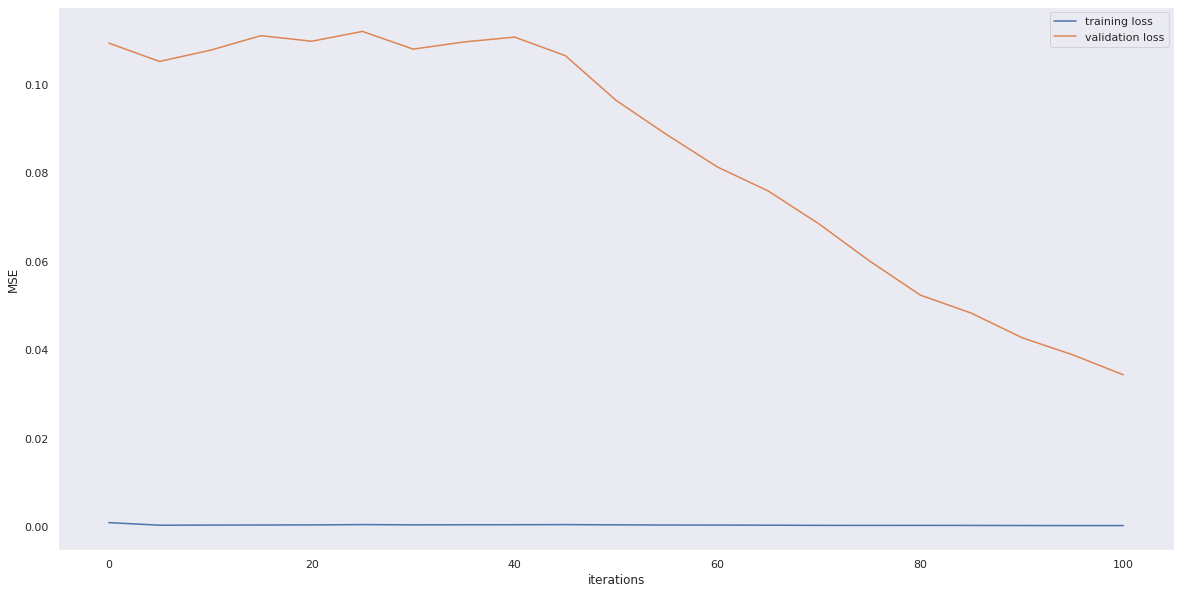

In [ ]:
a = np.arange(21)  
a = a*5 
plot1 = plt.figure(1)
plt.plot(a, train_loss_ep, label='training loss')
plt.plot(a,test_loss_ep, label = 'validation loss')
plt.xlabel('iterations')
plt.ylabel('MSE')

plt.legend()
plt.grid()
plt.savefig('training and validation losses.png')
plt.show()

In [ ]:


scaler= MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(np.array(close).reshape(-1, 1))
train_predict = scaler.inverse_transform(np.array(train_predict).reshape(-1, 1))
train_Y = scaler.inverse_transform([train_actual])
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))
test_Y = scaler.inverse_transform([test_actual])

import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(train_Y,train_predict.reshape(1,-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y,test_predict.reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))
data =  np.array(close).reshape(-1,1)

Train Score: 4.17 RMSE
Test Score: 49.76 RMSE


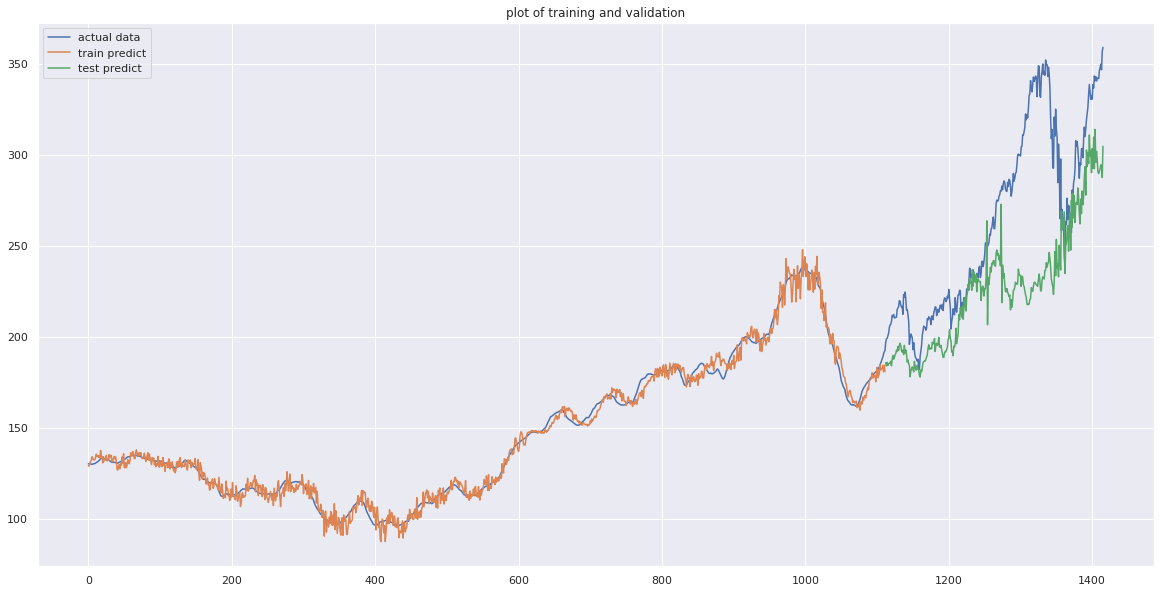

In [ ]:
train_Y=train_Y.reshape(-1,1)
test_Y = test_Y.reshape(-1,1)
data = np.concatenate((train_Y, test_Y), axis=0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
                                                                                                                                                                                                                                                                                                               
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):len(train_predict)+len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(data, label = 'actual data')
plt.plot(trainPredictPlot, label = 'train predict')
plt.plot(testPredictPlot, label = 'test predict')
plt.legend()
plt.title('plot of training and validation')
plt.grid(True)
plt.savefig('AAPL plot.png')
plt.show()

In [ ]:
np.save('train_predict_aapl.npy', train_predict)
np.save('test_predict_aapl.npy', test_predict)

FOR NFLX:

In [ ]:
data = df4
close = data.Close
holidays = pd.read_excel('/content/Holidays.xlsx')

data = data[['Date','Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})


lst = holidays['Holiday'].tolist()
holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(lst),
  'lower_window': 0,
  'upper_window': 5,
})
holiday

from fbprophet import Prophet
m = Prophet(interval_width = 0.5, yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.15, holidays = holiday)  
m.fit(data)

future = m.make_future_dataframe(periods=10)
prediction = m.predict(future)
pred= prediction['yhat']

data = df4[['Date','Close']]
data['Prophet trend'] = pred[:-10]
data = data[['Date','Prophet trend','Close']]
data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,Date,Prophet trend,Close
0,2015-01-02,34.919901,49.848572
1,2015-01-05,37.425436,47.311428
2,2015-01-06,47.455572,46.501427
3,2015-01-07,43.096578,46.742859
4,2015-01-08,44.695178,47.779999
...,...,...,...
1372,2020-06-16,424.045576,436.130005
1373,2020-06-17,424.057683,447.769989
1374,2020-06-18,424.616577,449.869995
1375,2020-06-19,424.265990,453.720001


In [ ]:
from functools import reduce

data_frames = [df,twitter,data]
df_net = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
df_net

,Date,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news,avg_twitter_score,Prophet trend,Close
0,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.264418,59.390911,63.009998
1,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.118068,59.390911,63.009998
2,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.216799,60.168801,65.274284
3,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.120869,60.168801,65.274284
4,2015-02-04,1.2890,1.2580,6.2477,0.8836,0.6589,55.80,1269.08,2.07,0.11,0.220129,0.280291,60.431837,64.101425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,2020-06-02,1.4512,1.3527,7.1012,0.8949,0.7969,39.57,1727.99,1.52,0.06,-0.393005,0.081420,423.694626,427.309998
1512,2020-06-03,1.4440,1.3502,7.1156,0.8902,0.7953,39.79,1698.10,1.54,0.06,-0.389954,0.072545,423.608799,421.970001
1513,2020-06-04,1.4398,1.3494,7.1105,0.8821,0.7937,39.99,1713.39,1.56,0.06,-0.388312,0.072505,424.058626,414.329987
1514,2020-06-05,1.4350,1.3421,7.0817,0.8856,0.7895,42.30,1683.65,1.59,0.07,-0.387279,0.064986,423.594882,419.600006


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



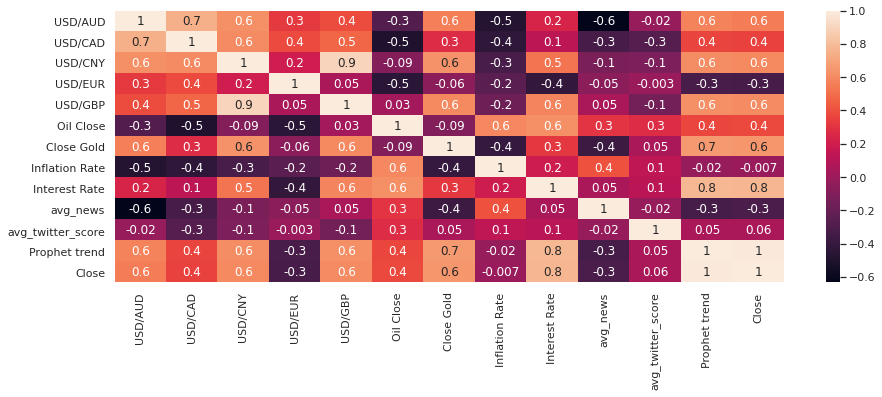

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
import seaborn as sns; sns.set()
sns.heatmap(df_net.corr(), annot = True, fmt='.1g')

In [ ]:
df_net = df_net.drop(columns = ['Date'])
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
df_net['USD/AUD'] = sc.fit_transform(np.array(df_net['USD/AUD']).reshape(-1, 1))
df_net['USD/CAD'] = sc.fit_transform(np.array(df_net['USD/CAD']).reshape(-1, 1))
df_net['USD/CNY'] = sc.fit_transform(np.array(df_net['USD/CNY']).reshape(-1, 1))
df_net['USD/GBP'] = sc.fit_transform(np.array(df_net['USD/GBP']).reshape(-1, 1))
df_net['Oil Close'] = sc.fit_transform(np.array(df_net['Oil Close']).reshape(-1, 1))
df_net['Close Gold'] = sc.fit_transform(np.array(df_net['Close Gold']).reshape(-1, 1))
df_net['Inflation Rate'] = sc.fit_transform(np.array(df_net['Inflation Rate']).reshape(-1, 1))
df_net['Interest Rate'] = sc.fit_transform(np.array(df_net['Interest Rate']).reshape(-1, 1))
df_net['avg_news'] = sc.fit_transform(np.array(df_net['avg_news']).reshape(-1, 1))
df_net['avg_twitter_score'] = sc.fit_transform(np.array(df_net['avg_twitter_score']).reshape(-1, 1))
df_net['Prophet trend'] = sc.fit_transform(np.array(df_net['Prophet trend']).reshape(-1, 1))
df_net['Close'] = sc.fit_transform(np.array(df_net['Close']).reshape(-1, 1))

In [ ]:
input_feature= df_net.iloc[:,:].values
input_data = input_feature

input_data
window = 100
output = 1
train_size = int(len(df_net) * 0.80)
test_size = len(df_net) - train_size

In [ ]:
train_data = input_data[:-test_size,:]
test_data = input_data[-test_size-window:,:]

EMA = 0.0
gamma = 0.1
for ti in range(train_size):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
train_data_normalized = torch.FloatTensor(train_data)
test_data_normalized = torch.FloatTensor(test_data)

In [ ]:
def create_inout_sequences(input_data, tw):
    train_inout_seq = []
    
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw,:]
        train_label = input_data[i+tw:i+tw+1,12]
        train_inout_seq.append((train_seq,train_label))
    return train_inout_seq



train_inout_seq = create_inout_sequences(train_data_normalized, window)
test_inout_seq = create_inout_sequences(test_data_normalized, window)

In [ ]:
class LSTM(nn.Module):
 
    def __init__ (self, input_dim, hidden_dim, batch_size, dropout, num_layers, output_dim):

        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.drop = dropout
        #self.drop = nn.Dropout(self.drop)
 
        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = self.drop)
 
        # Define the output layer
        self.fc = nn.Sequential(
            nn.Dropout(self.drop),
            nn.Linear(self.hidden_dim, output_dim),
        )
 
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
 
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.fc(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)





In [ ]:
lstm_input_size = 13
h1 = 40
batch_size = 1
output_dim = 1
num_layers = 1
dropout = 0.2
model = LSTM(lstm_input_size, h1, batch_size=batch_size, output_dim=output_dim, num_layers=num_layers, dropout = dropout)

loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = 0.001)

#####################
# Train model
#####################

num_epochs = 100

hist = np.zeros(num_epochs)

train_loss_ep = np.zeros(21)
test_loss_ep = np.zeros(21)
count = 0
for i in range(num_epochs+1):

  train_loss = [] 
  
  train_predict = []
  train_actual = []
  # Clear stored gradient

  model.train()
  for seq, labels in train_inout_seq:

    optimiser.zero_grad()
    model.zero_grad()
    
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(seq)
    train_predict.append((y_pred.item()))
    train_actual.append((labels))
 
    loss = loss_fn(y_pred, labels)
    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()
 
    # Backward pass
    loss.backward()
 
    # Update parameters
    optimiser.step()

    train_loss.append((loss.item()))

  if (i%5 == 0):
    print("Epoch ", i, "train MSE: ", sum(train_loss)/len(train_loss))
    train_loss_ep[count] = sum(train_loss)/len(train_loss)
    loss_tot1 = [] 
    test_predict = []
    test_actual = []

    model.eval()
    for seq1, labels1 in test_inout_seq:
      with torch.no_grad():
        #model.hidden = model.init_hidden()
        
        y_pred1 = model(seq1)
        test_predict.append(y_pred1.item())
        loss1 = loss_fn(y_pred1, labels1)

      loss_tot1.append((loss1.item()))

      test_actual.append((labels1))

    print("test MSE: ", sum(loss_tot1)/len(loss_tot1))
    test_loss_ep[count] = sum(loss_tot1)/len(loss_tot1)
    count = count + 1




/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



Epoch  0 train MSE:  0.0013439414394860354
test MSE:  0.01612857940785073
Epoch  5 train MSE:  0.0010753805728424832
test MSE:  0.014530233431097926
Epoch  10 train MSE:  0.0006834468145192642
test MSE:  0.016220160645581815
Epoch  15 train MSE:  0.0007768736779663878
test MSE:  0.015741983032037565
Epoch  20 train MSE:  0.0007902052558540895
test MSE:  0.021224785807977976
Epoch  25 train MSE:  0.0008516577133522319
test MSE:  0.014951170556168703
Epoch  30 train MSE:  0.0007027103421389343
test MSE:  0.011130475265449418
Epoch  35 train MSE:  0.0007826795410919474
test MSE:  0.010670536980538296
Epoch  40 train MSE:  0.0007615919601934238
test MSE:  0.012487192637413854
Epoch  45 train MSE:  0.0007542610058077357
test MSE:  0.015394114077429433
Epoch  50 train MSE:  0.0007072918236246806
test MSE:  0.013510811048800184
Epoch  55 train MSE:  0.0006780839272639335
test MSE:  0.012282037348151377
Epoch  60 train MSE:  0.0007866792869838531
test MSE:  0.0133558428060873
Epoch  65 train M

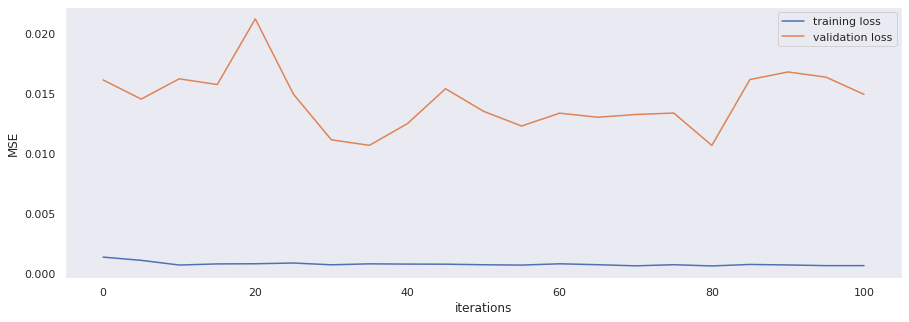

In [ ]:
a = np.arange(21)  
a = a*5 
plot1 = plt.figure(1)
plt.plot(a, train_loss_ep, label='training loss')
plt.plot(a,test_loss_ep, label = 'validation loss')
plt.xlabel('iterations')
plt.ylabel('MSE')

plt.legend()
plt.grid()
plt.savefig('training and validation losses.png')
plt.show()

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(np.array(close).reshape(-1, 1))
train_predict = scaler.inverse_transform(np.array(train_predict).reshape(-1, 1))
train_Y = scaler.inverse_transform([train_actual])
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))
test_Y = scaler.inverse_transform([test_actual])

import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(train_Y,train_predict.reshape(1,-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y,test_predict.reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))
data =  np.array(close).reshape(-1,1)

Train Score: 10.65 RMSE
Test Score: 51.61 RMSE


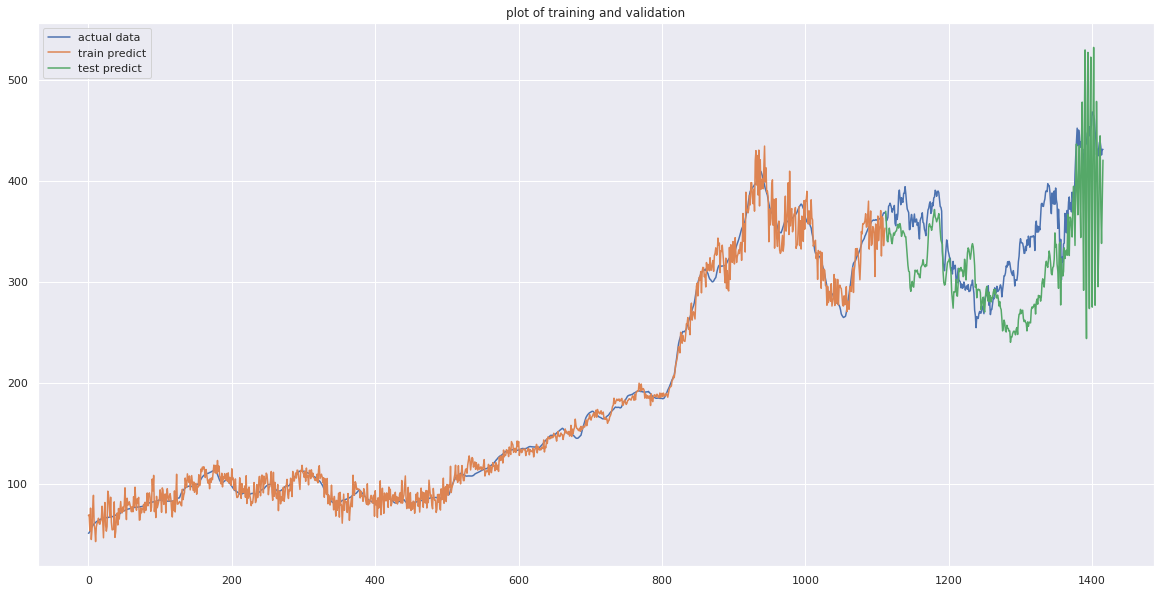

In [ ]:
train_Y=train_Y.reshape(-1,1)
test_Y = test_Y.reshape(-1,1)
data = np.concatenate((train_Y, test_Y), axis=0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
                                                                                                                                                                                                                                                                                                               
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):len(train_predict)+len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(data, label = 'actual data')
plt.plot(trainPredictPlot, label = 'train predict')
plt.plot(testPredictPlot, label = 'test predict')
plt.legend()
plt.title('plot of training and validation')
plt.grid(True)
plt.savefig('NFLX plot.png')
plt.show()

In [ ]:
np.save('train_predict_nflx.npy', train_predict)
np.save('test_predict_nflx.npy', test_predict)

FOR GOOG:

In [ ]:
data = df5
close = data.Close
holidays = pd.read_excel('/content/Holidays.xlsx')

data = data[['Date','Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})


lst = holidays['Holiday'].tolist()
holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(lst),
  'lower_window': 0,
  'upper_window': 5,
})
holiday

from fbprophet import Prophet
m = Prophet(interval_width = 0.5, yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True, changepoint_prior_scale = 0.15, holidays = holiday)  
m.fit(data)

future = m.make_future_dataframe(periods=10)
prediction = m.predict(future)
pred= prediction['yhat']

data = df5[['Date','Close']]
data['Prophet trend'] = pred[:-10]
data = data[['Date','Prophet trend','Close']]
data

,Date,Prophet trend,Close
0,2015-01-02,485.300670,523.373108
1,2015-01-05,492.526851,512.463013
2,2015-01-06,500.955675,500.585632
3,2015-01-07,499.253151,499.727997
4,2015-01-08,502.796580,501.303680
...,...,...,...
1372,2020-06-16,1349.374976,1442.719971
1373,2020-06-17,1348.951046,1451.119995
1374,2020-06-18,1346.984154,1435.959961
1375,2020-06-19,1344.942056,1431.719971


In [ ]:
from functools import reduce

data_frames = [df,twitter,data]
df_net = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
df_net

,Date,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,Oil Close,Close Gold,Inflation Rate,Interest Rate,avg_news,avg_twitter_score,Prophet trend,Close
0,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.264418,543.237097,527.033020
1,2015-02-02,1.2822,1.2583,6.2595,0.8818,0.6655,54.80,1285.00,1.98,0.12,0.223370,0.118068,543.237097,527.033020
2,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.216799,542.457674,527.790955
3,2015-02-03,1.2884,1.2443,6.2579,0.8728,0.6605,58.72,1260.60,2.00,0.12,0.222219,0.120869,542.457674,527.790955
4,2015-02-04,1.2890,1.2580,6.2477,0.8836,0.6589,55.80,1269.08,2.07,0.11,0.220129,0.280291,543.392649,521.328674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,2020-06-02,1.4512,1.3527,7.1012,0.8949,0.7969,39.57,1727.99,1.52,0.06,-0.393005,0.081420,1358.056850,1439.219971
1512,2020-06-03,1.4440,1.3502,7.1156,0.8902,0.7953,39.79,1698.10,1.54,0.06,-0.389954,0.072545,1360.037783,1436.380005
1513,2020-06-04,1.4398,1.3494,7.1105,0.8821,0.7937,39.99,1713.39,1.56,0.06,-0.388312,0.072505,1360.433359,1412.180054
1514,2020-06-05,1.4350,1.3421,7.0817,0.8856,0.7895,42.30,1683.65,1.59,0.07,-0.387279,0.064986,1360.658230,1438.390015


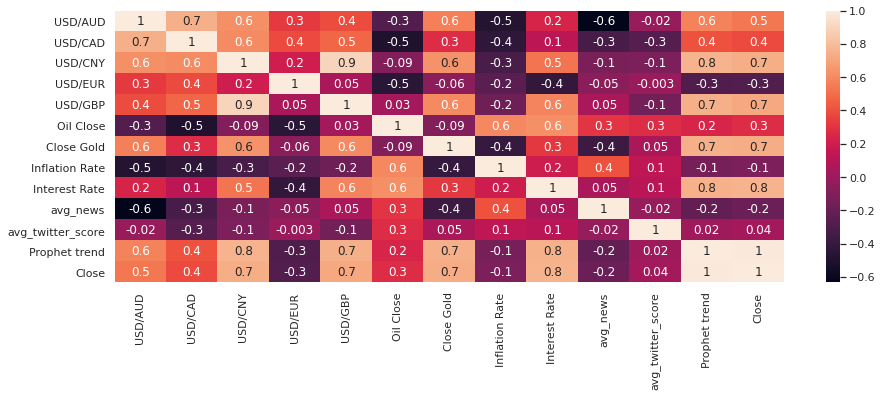

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
import seaborn as sns; sns.set()
sns.heatmap(df_net.corr(), annot = True, fmt='.1g')

In [ ]:
df_net = df_net.drop(columns = ['Date'])
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
df_net['USD/AUD'] = sc.fit_transform(np.array(df_net['USD/AUD']).reshape(-1, 1))
df_net['USD/CAD'] = sc.fit_transform(np.array(df_net['USD/CAD']).reshape(-1, 1))
df_net['USD/CNY'] = sc.fit_transform(np.array(df_net['USD/CNY']).reshape(-1, 1))
df_net['USD/GBP'] = sc.fit_transform(np.array(df_net['USD/GBP']).reshape(-1, 1))
df_net['Oil Close'] = sc.fit_transform(np.array(df_net['Oil Close']).reshape(-1, 1))
df_net['Close Gold'] = sc.fit_transform(np.array(df_net['Close Gold']).reshape(-1, 1))
df_net['Inflation Rate'] = sc.fit_transform(np.array(df_net['Inflation Rate']).reshape(-1, 1))
df_net['Interest Rate'] = sc.fit_transform(np.array(df_net['Interest Rate']).reshape(-1, 1))
df_net['avg_news'] = sc.fit_transform(np.array(df_net['avg_news']).reshape(-1, 1))
df_net['avg_twitter_score'] = sc.fit_transform(np.array(df_net['avg_twitter_score']).reshape(-1, 1))
df_net['Prophet trend'] = sc.fit_transform(np.array(df_net['Prophet trend']).reshape(-1, 1))
df_net['Close'] = sc.fit_transform(np.array(df_net['Close']).reshape(-1, 1))

In [ ]:
input_feature= df_net.iloc[:,:].values
input_data = input_feature

input_data
window = 100
output = 1
train_size = int(len(df_net) * 0.80)
test_size = len(df_net) - train_size

In [ ]:
train_data = input_data[:-test_size,:]
test_data = input_data[-test_size-window:,:]

EMA = 0.0
gamma = 0.1
for ti in range(train_size):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA
train_data_normalized = torch.FloatTensor(train_data)
test_data_normalized = torch.FloatTensor(test_data)

In [ ]:
def create_inout_sequences(input_data, tw):
    train_inout_seq = []
    
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw,:]
        train_label = input_data[i+tw:i+tw+1,12]
        train_inout_seq.append((train_seq,train_label))
    return train_inout_seq



train_inout_seq = create_inout_sequences(train_data_normalized, window)
test_inout_seq = create_inout_sequences(test_data_normalized, window)

In [ ]:
class LSTM(nn.Module):
 
    def __init__ (self, input_dim, hidden_dim, batch_size, dropout, num_layers, output_dim):

        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.drop = dropout
        #self.drop = nn.Dropout(self.drop)
 
        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = self.drop)
 
        # Define the output layer
        self.fc = nn.Sequential(
            nn.Dropout(self.drop),
            nn.Linear(self.hidden_dim, output_dim),
        )
 
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
 
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.fc(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)





In [ ]:
lstm_input_size = 13
h1 = 20
batch_size = 1
output_dim = 1
num_layers = 1
dropout = 0.2
model = LSTM(lstm_input_size, h1, batch_size=batch_size, output_dim=output_dim, num_layers=num_layers, dropout = dropout)

loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = 0.001)

#####################
# Train model
#####################

num_epochs = 100

hist = np.zeros(num_epochs)

train_loss_ep = np.zeros(21)
test_loss_ep = np.zeros(21)
count = 0
for i in range(num_epochs+1):

  train_loss = [] 
  
  train_predict = []
  train_actual = []
  # Clear stored gradient

  model.train()
  for seq, labels in train_inout_seq:

    optimiser.zero_grad()
    model.zero_grad()
    
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(seq)
    train_predict.append((y_pred.item()))
    train_actual.append((labels))
 
    loss = loss_fn(y_pred, labels)
    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()
 
    # Backward pass
    loss.backward()
 
    # Update parameters
    optimiser.step()

    train_loss.append((loss.item()))

  if (i%5 == 0):
    print("Epoch ", i, "train MSE: ", sum(train_loss)/len(train_loss))
    train_loss_ep[count] = sum(train_loss)/len(train_loss)
    loss_tot1 = [] 
    test_predict = []
    test_actual = []

    model.eval()
    for seq1, labels1 in test_inout_seq:
      with torch.no_grad():
        #model.hidden = model.init_hidden()
        
        y_pred1 = model(seq1)
        test_predict.append(y_pred1.item())
        loss1 = loss_fn(y_pred1, labels1)

      loss_tot1.append((loss1.item()))

      test_actual.append((labels1))

    print("test MSE: ", sum(loss_tot1)/len(loss_tot1))
    test_loss_ep[count] = sum(loss_tot1)/len(loss_tot1)
    count = count + 1




/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



Epoch  0 train MSE:  0.0028690067171805874
test MSE:  0.023388670409113087
Epoch  5 train MSE:  0.0011933585369914403
test MSE:  0.01729873084111981
Epoch  10 train MSE:  0.0008514135838672672
test MSE:  0.013536812343740046
Epoch  15 train MSE:  0.0008477117473426202
test MSE:  0.01545364493905513
Epoch  20 train MSE:  0.0010154766348266096
test MSE:  0.017080359717737872
Epoch  25 train MSE:  0.0009450857799538519
test MSE:  0.017942990280542536
Epoch  30 train MSE:  0.000807847971344901
test MSE:  0.016471473429087696
Epoch  35 train MSE:  0.0009134547261872027
test MSE:  0.021040137424237024
Epoch  40 train MSE:  0.0008311410175191005
test MSE:  0.0168825224280729
Epoch  45 train MSE:  0.0008636340269419351
test MSE:  0.022464260704338893
Epoch  50 train MSE:  0.0008883436324223731
test MSE:  0.0231497044028192
Epoch  55 train MSE:  0.0007910138618422505
test MSE:  0.0187275147560993
Epoch  60 train MSE:  0.0007786223628532505
test MSE:  0.019586419298801245
Epoch  65 train MSE:  0

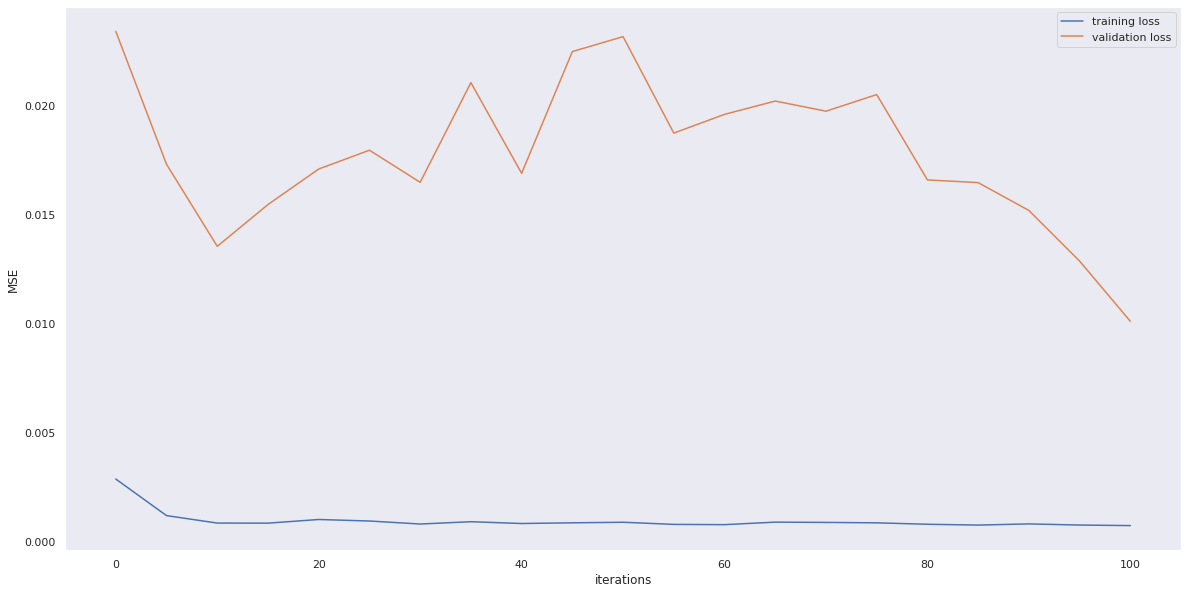

In [ ]:
a = np.arange(21)  
a = a*5 
plot1 = plt.figure(1)
plt.plot(a, train_loss_ep, label='training loss')
plt.plot(a,test_loss_ep, label = 'validation loss')
plt.xlabel('iterations')
plt.ylabel('MSE')

plt.legend()
plt.grid()
plt.savefig('training and validation losses.png')
plt.show()

In [ ]:


scaler= MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(np.array(close).reshape(-1, 1))
train_predict = scaler.inverse_transform(np.array(train_predict).reshape(-1, 1))
train_Y = scaler.inverse_transform([train_actual])
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))
test_Y = scaler.inverse_transform([test_actual])

import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(train_Y,train_predict.reshape(1,-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y,test_predict.reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))
data =  np.array(close).reshape(-1,1)

Train Score: 28.09 RMSE
Test Score: 104.07 RMSE


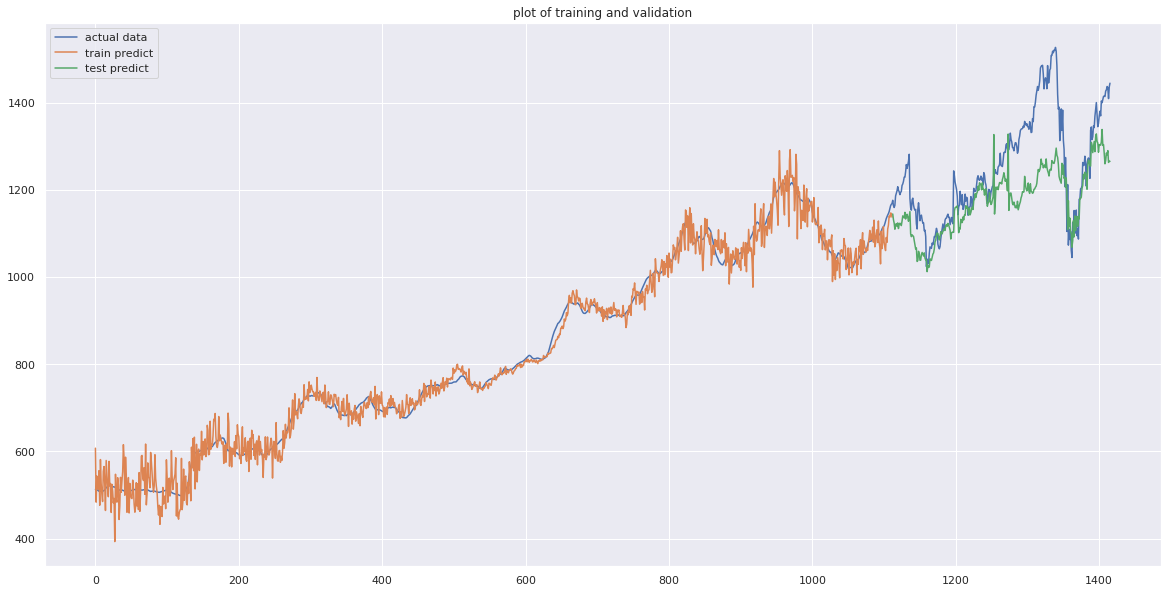

In [ ]:
train_Y=train_Y.reshape(-1,1)
test_Y = test_Y.reshape(-1,1)
data = np.concatenate((train_Y, test_Y), axis=0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
                                                                                                                                                                                                                                                                                                               
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict):len(train_predict)+len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(data, label = 'actual data')
plt.plot(trainPredictPlot, label = 'train predict')
plt.plot(testPredictPlot, label = 'test predict')
plt.legend()
plt.title('plot of training and validation')
plt.grid(True)
plt.savefig('GOOG plot.png')
plt.show()

In [ ]:
np.save('train_predict_goog.npy', train_predict)
np.save('test_predict_goog.npy', test_predict)

COMPARING RESULTS WITH DJIA:

In [32]:
import numpy as np
import pandas as pd

In [33]:
a1 = np.load('/content/train_predict_aapl.npy')
a2 = np.load('/content/train_predict_amzn.npy')
a3 = np.load('/content/train_predict_nflx.npy')
a4 = np.load('/content/train_predict_goog.npy')
a5 = np.load('/content/train_predict_fb.npy')


In [34]:
b1 = np.load('/content/test_predict_aapl.npy')
b2 = np.load('/content/test_predict_amzn.npy')
b3 = np.load('/content/test_predict_nflx.npy')
b4 = np.load('/content/test_predict_goog.npy')
b5 = np.load('/content/test_predict_fb.npy')

In [35]:
train_predict = a1+a2+a3+a4+a5
test_predict = b1+b2+b3+b4+b5

In [51]:
close = df1.Close + df2.Close + df3.Close + df4.Close + df5.Close 

In [37]:
import matplotlib.pyplot as plt

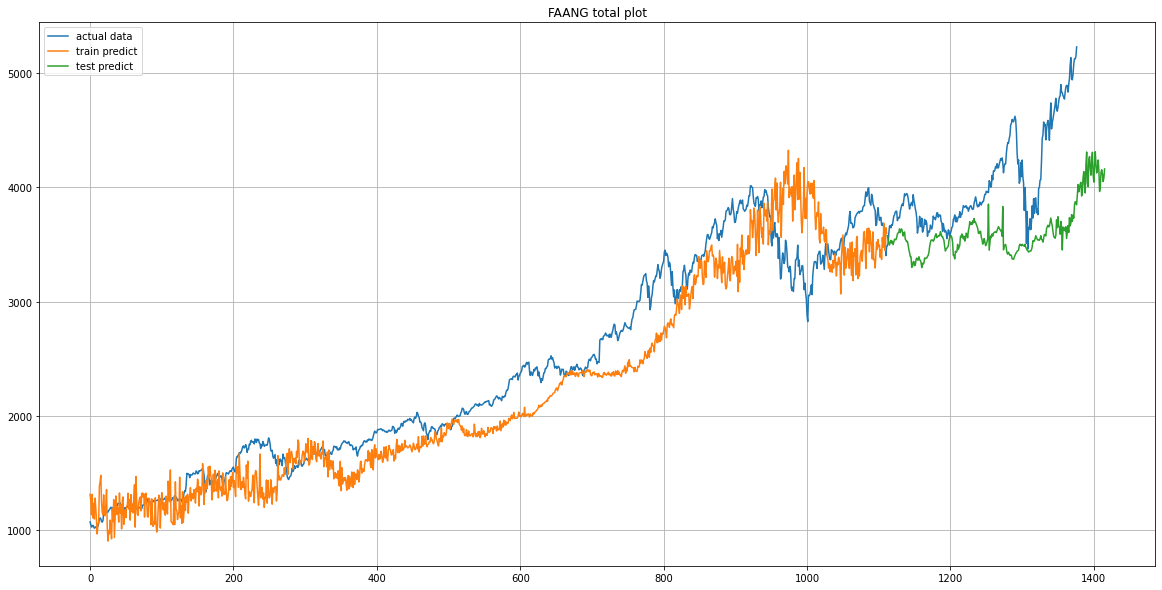

In [52]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
data = np.append(train_predict,test_predict)
data = data.reshape(-1,1)                                                                                                                                                                                                                                                                                                             
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict): len(train_predict) + len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(close, label = 'actual data')
plt.plot(trainPredictPlot, label = 'train predict')
plt.plot(testPredictPlot, label = 'test predict')
plt.legend()
plt.title('FAANG total plot')
plt.grid(True)
plt.savefig('FAANG total plot.png')
plt.show()

<function matplotlib.pyplot.show>

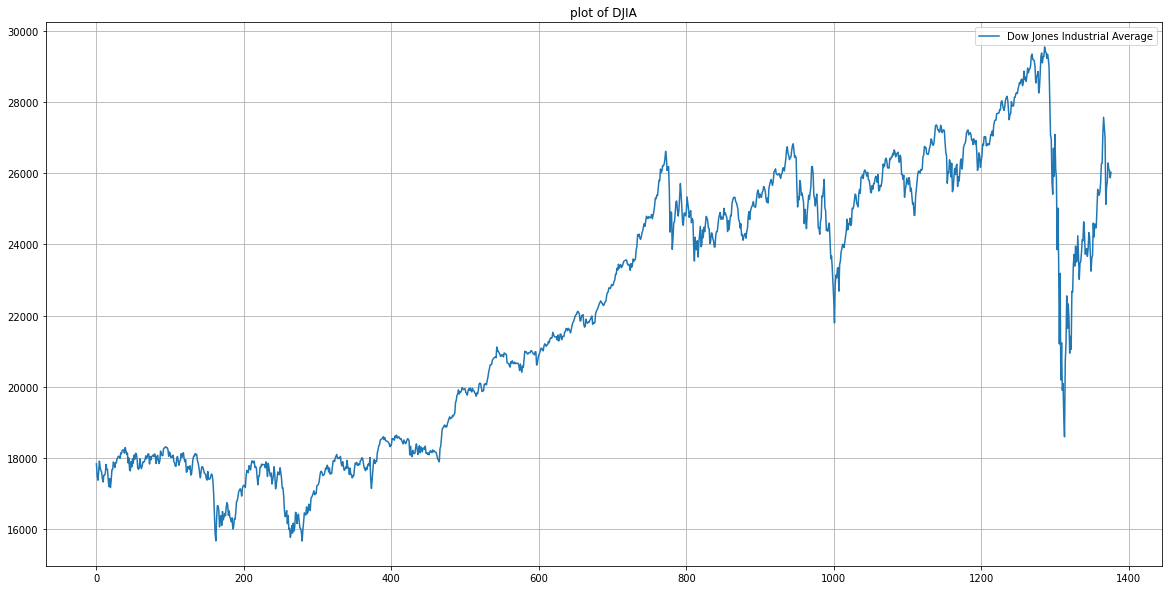

In [53]:
djia = pd.read_csv('/content/DJI.csv')
djclose = djia.Close
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.plot(djclose, label = 'Dow Jones Industrial Average')


plt.legend()
plt.title('plot of DJIA')
plt.grid(True)
plt.show

In [54]:
np.corrcoef(close,djclose)

array([[1.        , 0.92318184],
       [0.92318184, 1.        ]])